# EDA

**Imports**

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import os
import itertools
import sys
sys.path.append("./util_")
import prepare_
import explore_

from tqdm.auto import tqdm, trange
np.random.seed(95)

**get and split data**

In [2]:
# get data
zillow = prepare_.wrangle_zillow()
zillow.head()

,bedrooms,bathrooms,sqr_feet,tax_value,year_built,tax_amount,county
4,4,2.0,3633.0,296425.0,2005,6941.39,6037.0
6,3,4.0,1620.0,847770.0,2011,10244.94,6037.0
7,3,2.0,2077.0,646760.0,1926,7924.68,6037.0
11,0,0.0,1200.0,5328.0,1972,91.60,6037.0
14,0,0.0,171.0,6920.0,1973,255.17,6037.0


In [3]:
# split data
train, validate, test = prepare_.split_data_(df=zillow,
                                            test_size=0.2,
                                             random_state=95)
(train.shape, validate.shape, test.shape)

((1237902, 7), (412634, 7), (412635, 7))

## Univariate statistics

In [4]:
# Discdescribetive statistics
train.describe()

,bedrooms,bathrooms,sqr_feet,tax_value,year_built,tax_amount,county
count,1.237902e+06,1.237902e+06,1.237902e+06,1.237902e+06,1.237902e+06,1.237902e+06,1.237902e+06
mean,3.266276e+00,2.164247e+00,1.773047e+03,3.870556e+05,1.960516e+03,4.769355e+03,6.048342e+03
std,8.928379e-01,8.495546e-01,7.313609e+02,2.885897e+05,2.160506e+01,3.316454e+03,2.042486e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,2.200000e+01,1.900000e+03,6.340000e+00,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.248000e+03,1.853890e+05,1.949000e+03,2.498312e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.602000e+03,3.192370e+05,1.958000e+03,4.010695e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.140000e+03,5.083908e+05,1.974000e+03,6.121273e+03,6.059000e+03
max,7.000000e+00,7.000000e+00,5.000000e+03,4.670150e+06,2.016000e+03,1.999984e+04,6.111000e+03


In [5]:
# look at the number of unique categories
train.nunique()

bedrooms           8
bathrooms         16
sqr_feet        4793
tax_value     418106
year_built       117
tax_amount    670028
county             3
dtype: int64

In [6]:
# find only columns with low count of categories
low_category_cols = train.nunique()[train.nunique() < 1000].index
low_category_cols

Index(['bedrooms', 'bathrooms', 'year_built', 'county'], dtype='object')

In [7]:
def plot_categorical_and_continuous_vars():
    # plot all the low category columns to see the distributions
    for col in low_category_cols:
        print(col.upper())
        print("count of unique:",train[col].nunique())
        print(train[col].value_counts().sort_values(), train[col].value_counts(normalize=True).sort_values())

        # plot
        fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17,4))
        sns.countplot(data= train, x=col, ax=ax[0])
        sns.boxplot(data= train, x=col, ax=ax[1])
        sns.violinplot(data= train, x=col, ax=ax[2])
        plt.tight_layout()

        # save visual to file path
        explore_.save_visuals(fig=fig, viz_name=col, folder_name= 1)

        plt.show()

BEDROOMS
count of unique: 8
7      1608
0      2362
6     10740
1     13409
5     78491
2    197718
4    365611
3    567963
Name: bedrooms, dtype: int64 7    0.001299
0    0.001908
6    0.008676
1    0.010832
5    0.063406
2    0.159720
4    0.295347
3    0.458811
Name: bedrooms, dtype: float64


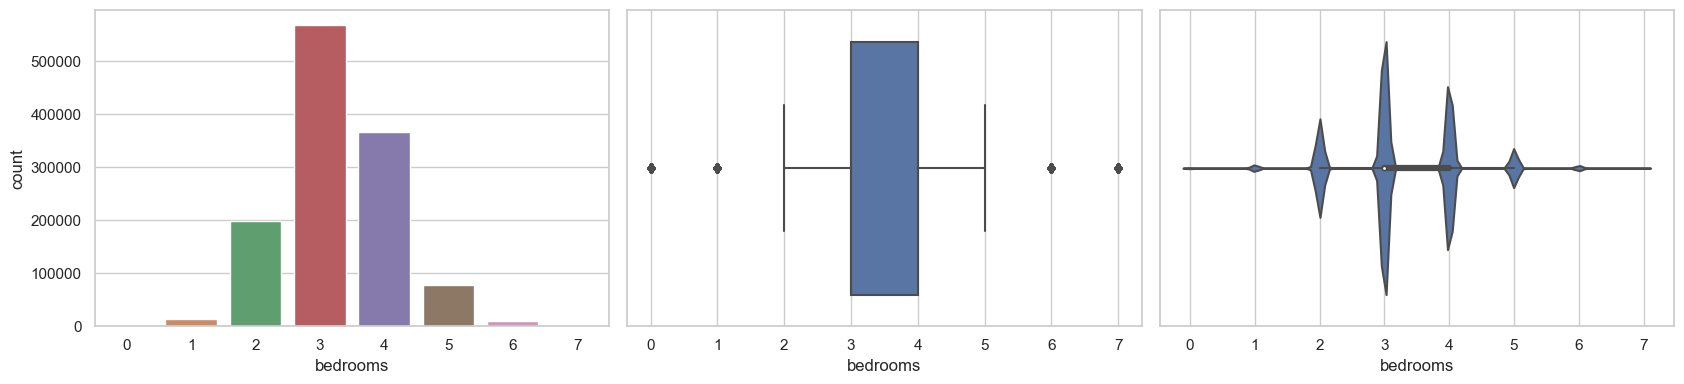

BATHROOMS
count of unique: 16
1.75         3
0.50         8
6.50        81
7.00       205
5.50      1200
6.00      1697
0.00      2359
4.50      8816
5.00     10161
3.50     15539
1.50     18101
4.00     42427
2.50     84276
1.00    245027
3.00    246929
2.00    561073
Name: bathrooms, dtype: int64 1.75    0.000002
0.50    0.000006
6.50    0.000065
7.00    0.000166
5.50    0.000969
6.00    0.001371
0.00    0.001906
4.50    0.007122
5.00    0.008208
3.50    0.012553
1.50    0.014622
4.00    0.034273
2.50    0.068080
1.00    0.197937
3.00    0.199474
2.00    0.453245
Name: bathrooms, dtype: float64


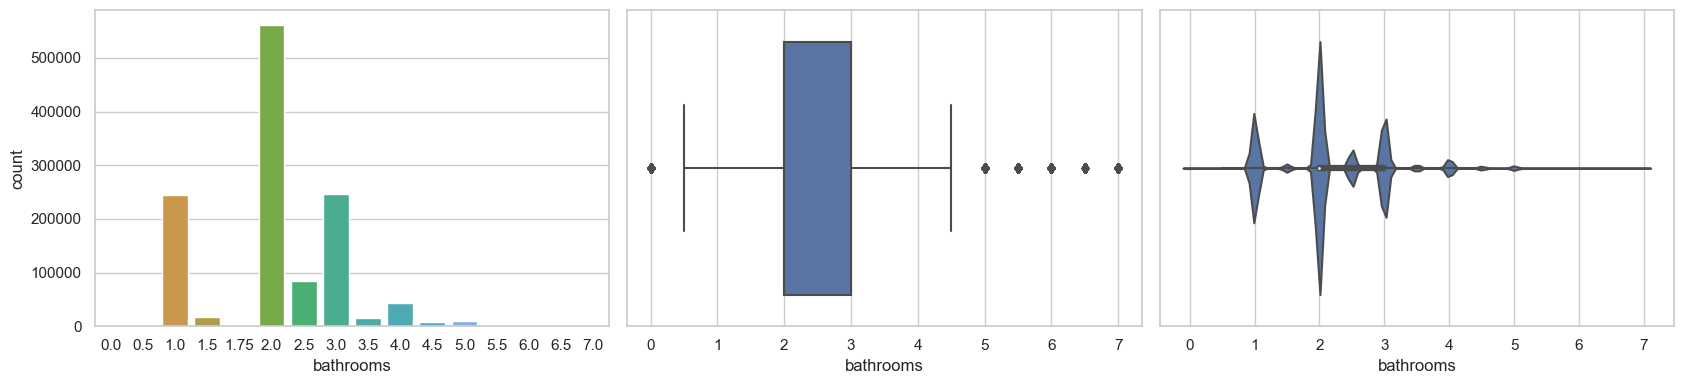

YEAR_BUILT
count of unique: 117
2016       44
1900      368
1902      398
1904      605
1903      709
        ...  
1956    36756
1953    37002
1954    40995
1950    42144
1955    50029
Name: year_built, Length: 117, dtype: int64 2016    0.000036
1900    0.000297
1902    0.000322
1904    0.000489
1903    0.000573
          ...   
1956    0.029692
1953    0.029891
1954    0.033117
1950    0.034045
1955    0.040414
Name: year_built, Length: 117, dtype: float64


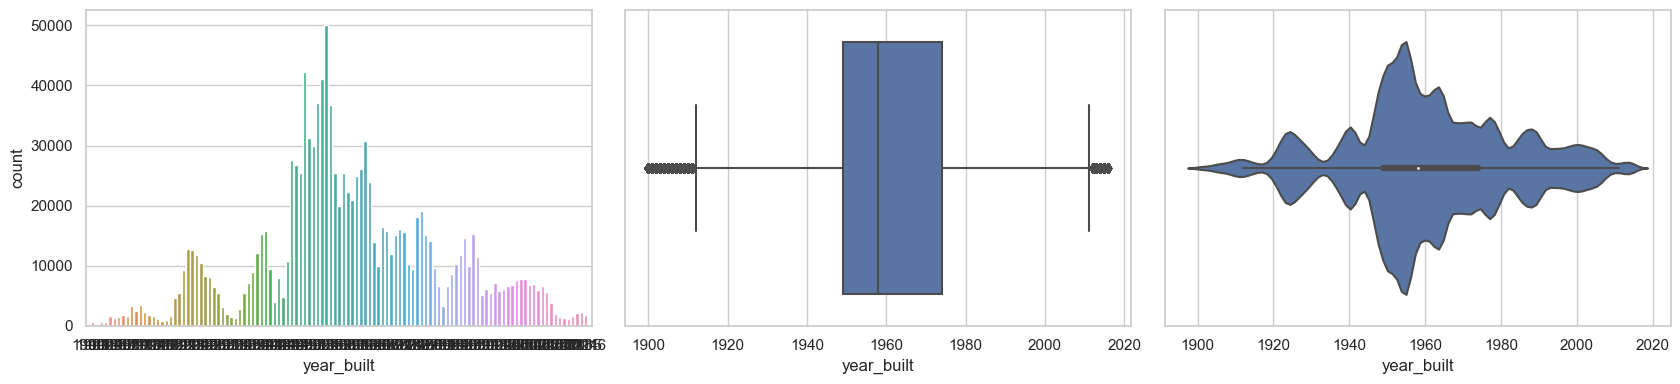

COUNTY
count of unique: 3
6111.0     95317
6059.0    317562
6037.0    825023
Name: county, dtype: int64 6111.0    0.076999
6059.0    0.256532
6037.0    0.666469
Name: county, dtype: float64


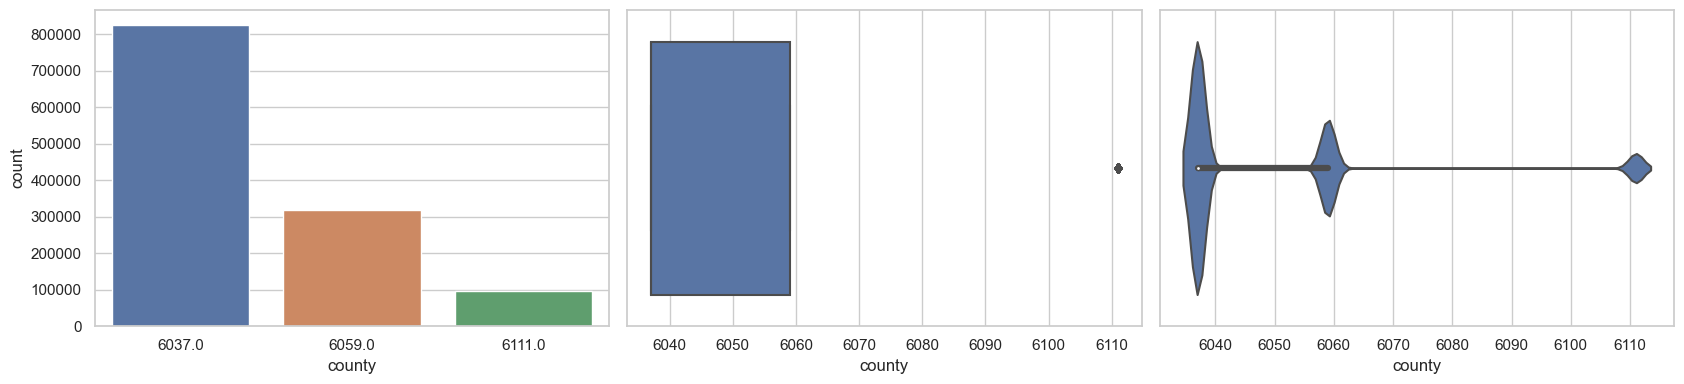

In [8]:
plot_categorical_and_continuous_vars()

**Univariate for other continuous variables**

SQR_FEET
count of unique: 4793


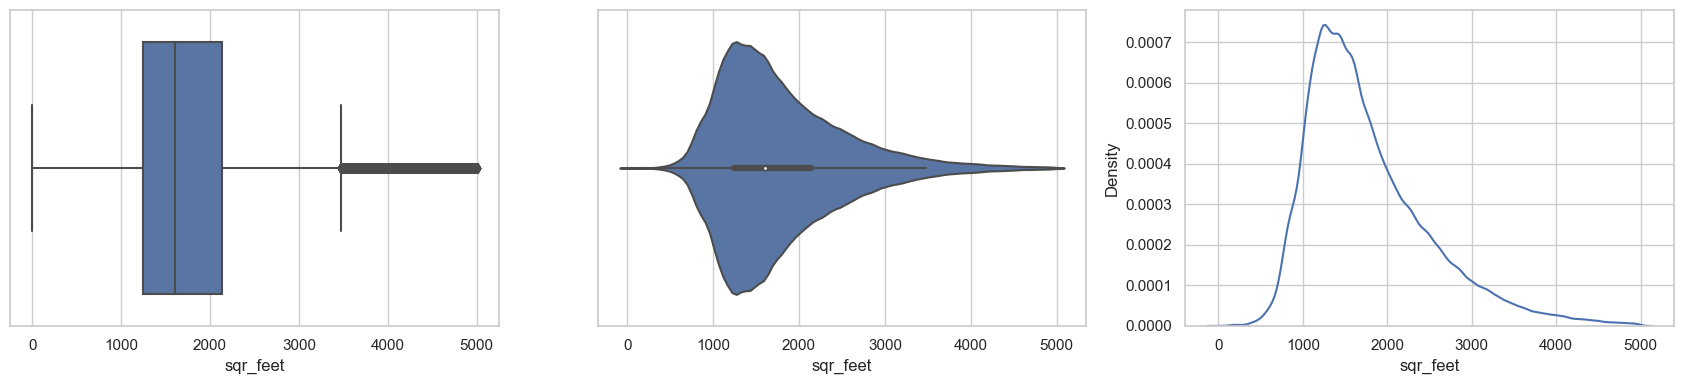

TAX_VALUE
count of unique: 418106


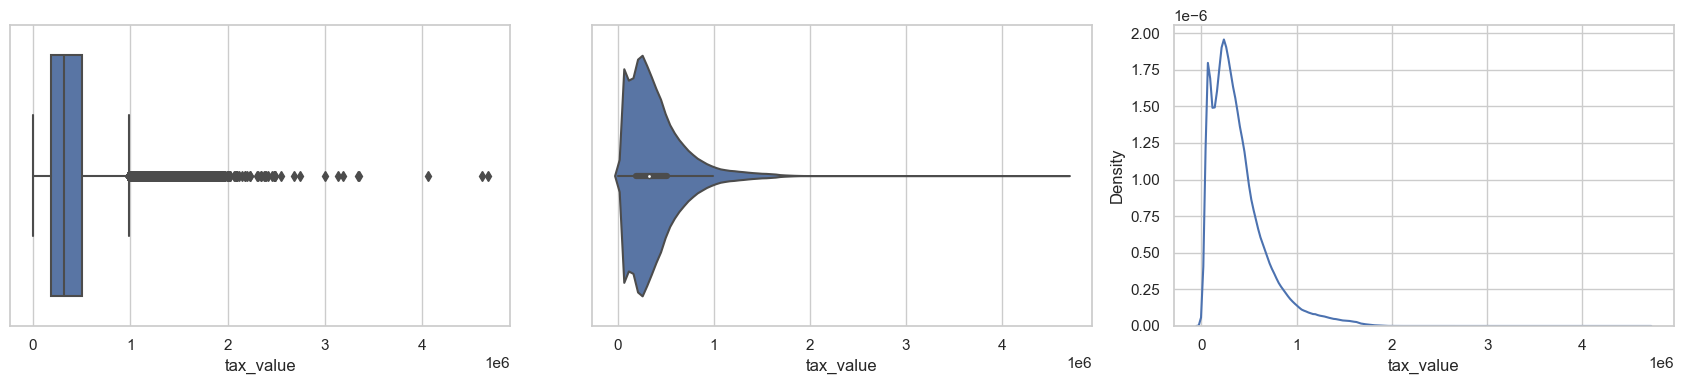

TAX_AMOUNT
count of unique: 670028


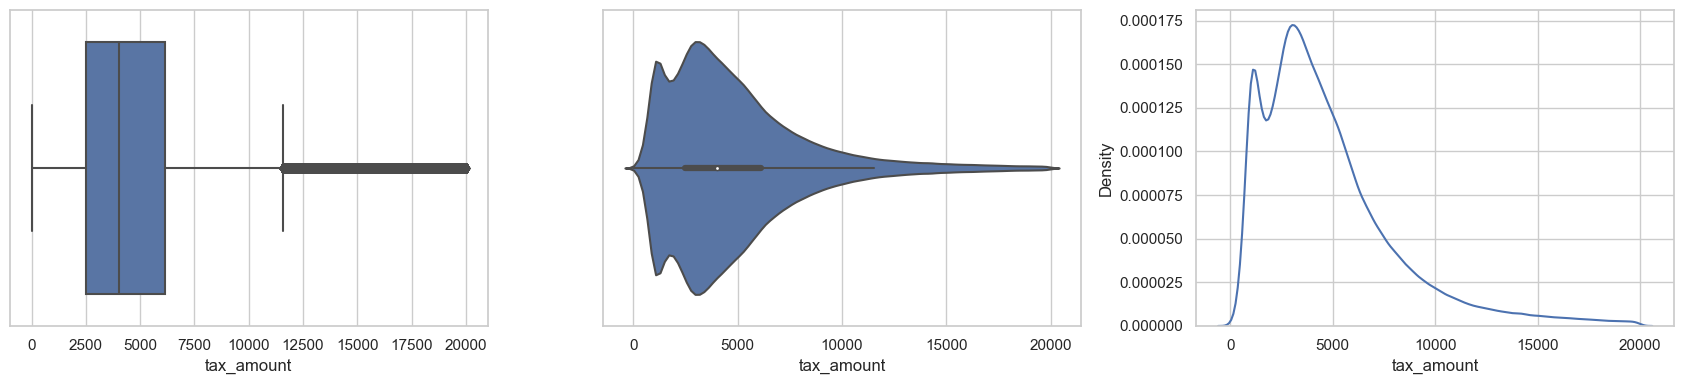

In [9]:
# # Get a sample of the continious columns to fro ploting
train_continious = train[["sqr_feet", "tax_value", "tax_amount"]]

# plot all the low category columns to see the distributions
for col in train_continious.columns:
    print(col.upper())
    print("count of unique:",train[col].nunique())
    # plot
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17,4))
    sns.boxplot(data= train, x=col, ax=ax[0])
    sns.violinplot(data= train, x=col, ax=ax[1])
    sns.kdeplot(train, x=col, ax=ax[2])
    plt.tight_layout()
    
    # save visual to file path
    explore_.save_visuals(fig=fig, viz_name=col, folder_name= 1)

    plt.show()

**Take aways**
- bedrooms and bathrooms have values That I consider outliers so I will remove them from my data. And property that has more than 10 bedrooms aor bath rooms is removed.


## Bivariate statistics

In [10]:
# separeate discrete from continuous variables
continuous_col = []
categorical_col = []
target = "tax_value"

for col in train.columns:
    if col == target:
        pass
    elif train[col].dtype == "O":
        categorical_col.append(col)

    else:
        if len(train[col].unique()) < 20: #making anything with less than 4 unique values a catergorical value
            categorical_col.append(col)
        else:
            continuous_col.append(col)
            
categorical_col, continuous_col

(['bedrooms', 'bathrooms', 'county'], ['sqr_feet', 'year_built', 'tax_amount'])

**categorical variables**

In [11]:
# Get a sample of the categorical columns for ploting
train_continious = train[categorical_col].sample(100_000)

# pairs of comninmations
categorical_comb = list(itertools.product(categorical_col, ["tax_value"]))
categorical_comb

[('bedrooms', 'tax_value'),
 ('bathrooms', 'tax_value'),
 ('county', 'tax_value')]

BEDROOMS VS TAX_VALUE


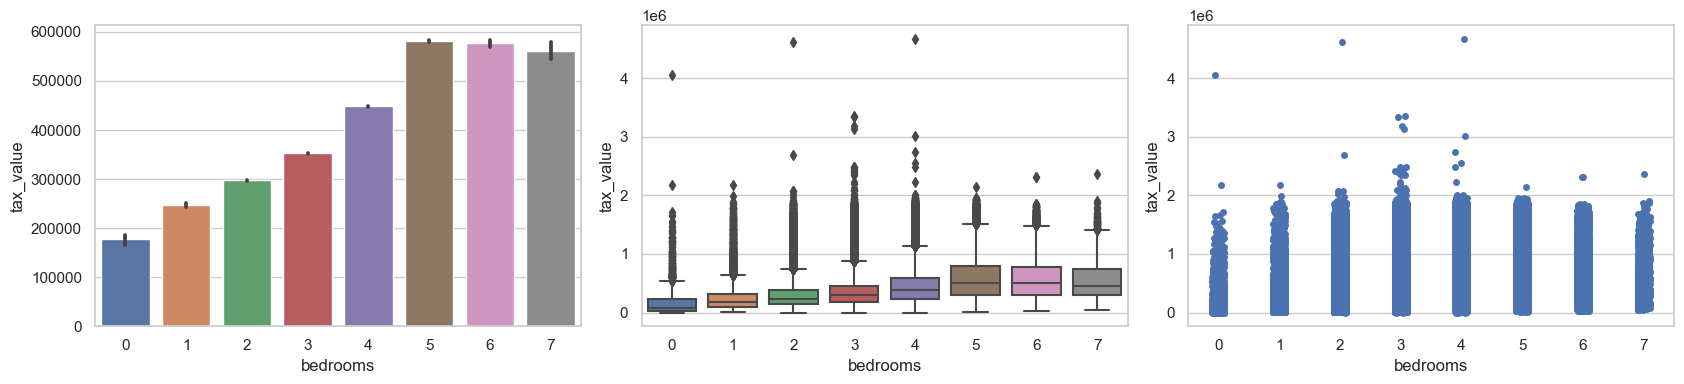

BATHROOMS VS TAX_VALUE


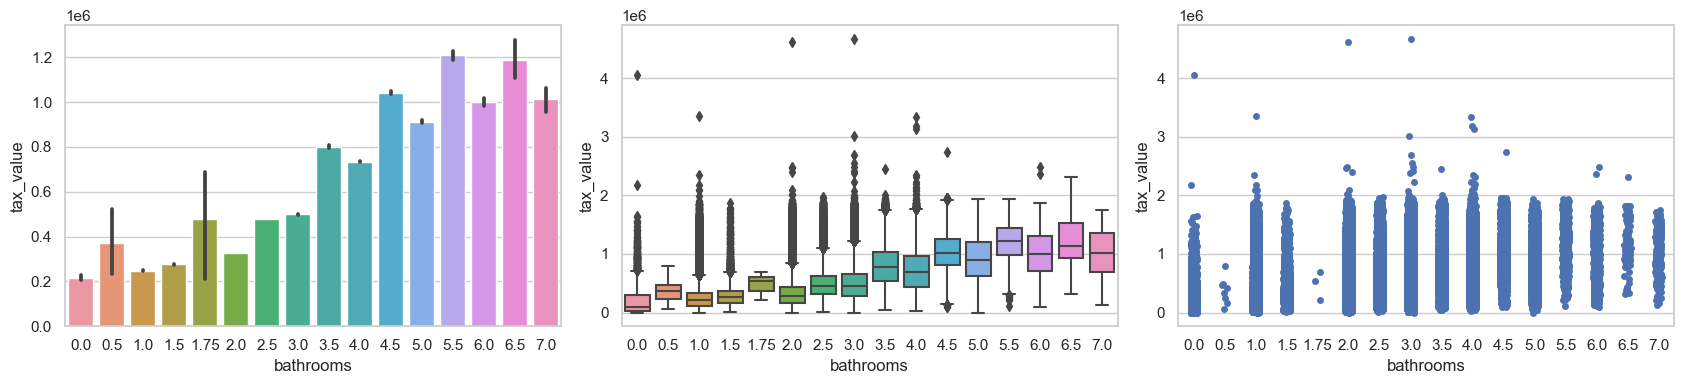

COUNTY VS TAX_VALUE


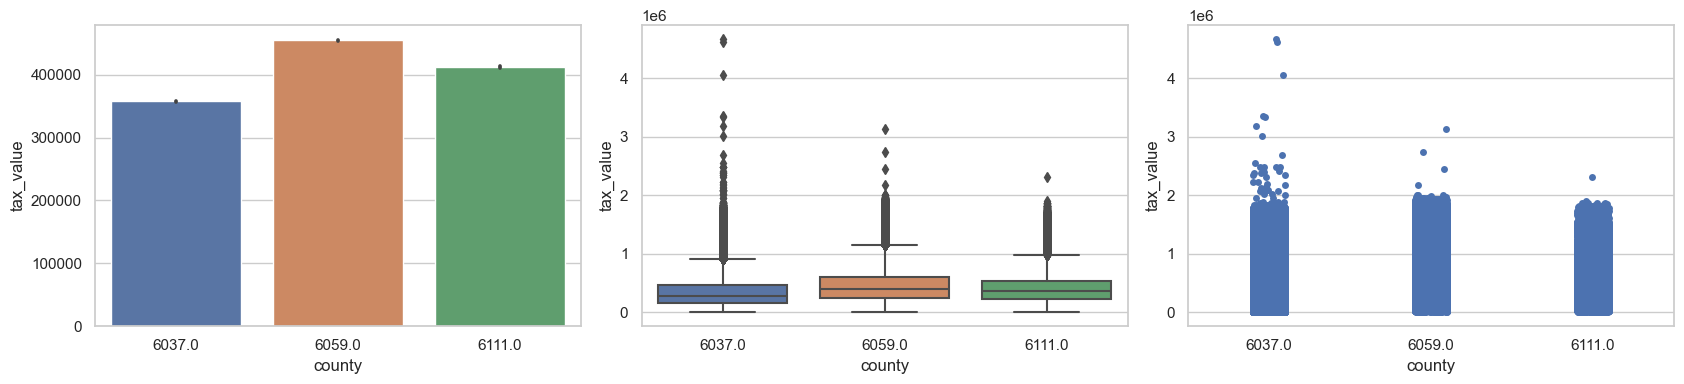

In [12]:
# Get a sample of the continious columns to fro ploting
train_full_sample = train[train.columns].sample(100_000)

# plot all the low category columns to see the distributions
for col in categorical_comb:
    print(col[0].upper(), "VS", col[1].upper())
    # plot
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17,4))
    sns.barplot(data= train, x=col[0] , y=col[1], ax= ax[0])
    sns.boxplot(data= train, x=col[0] , y=col[1], ax= ax[1])
    sns.stripplot(data= train, x=col[0] , y=col[1], ax= ax[2])
    plt.tight_layout()
    
    # save visual to file path
    explore_.save_visuals(fig=fig, viz_name=f"{col[0]}_vs_{col[1]}", folder_name= 2)
    
    plt.show()


**Continuous variables**

In [13]:
# Get a sample of the categorical columns for ploting
train_continious = train[continuous_col].sample(50_000)

# pairs of comninmations
continuous_comb = list(itertools.product(continuous_col, ["tax_value"]))
continuous_comb

[('sqr_feet', 'tax_value'),
 ('year_built', 'tax_value'),
 ('tax_amount', 'tax_value')]

SQR_FEET VS TAX_VALUE


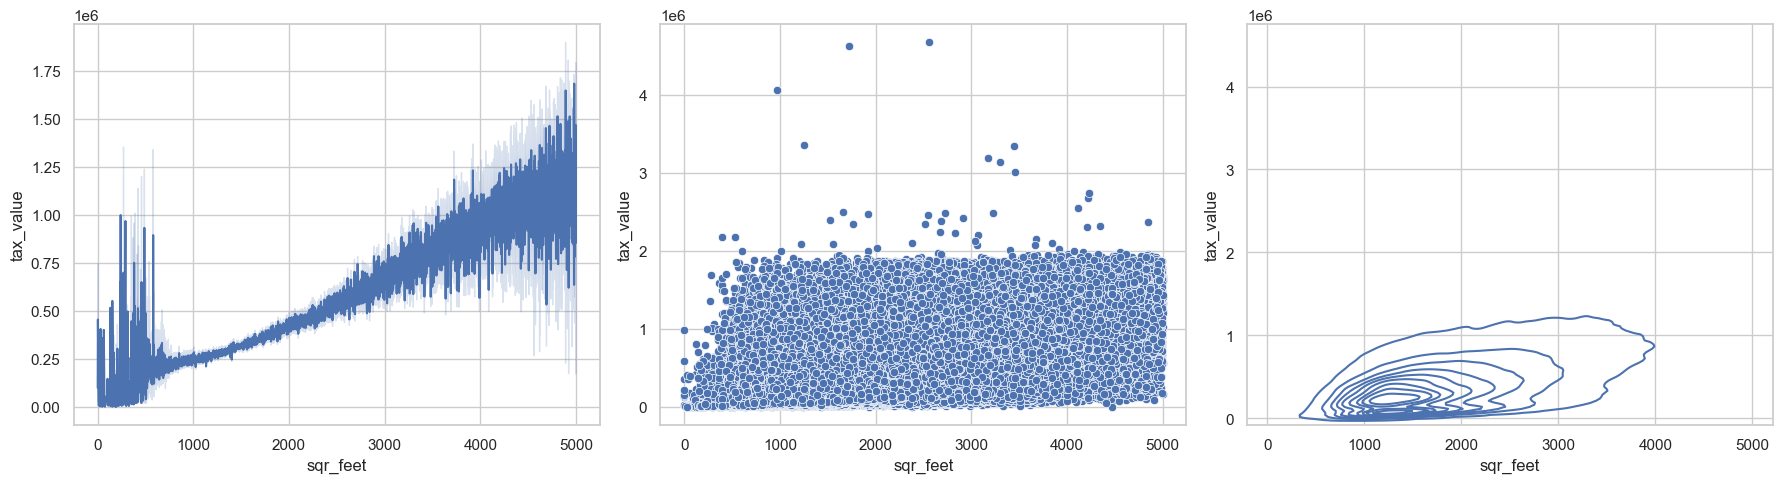

YEAR_BUILT VS TAX_VALUE


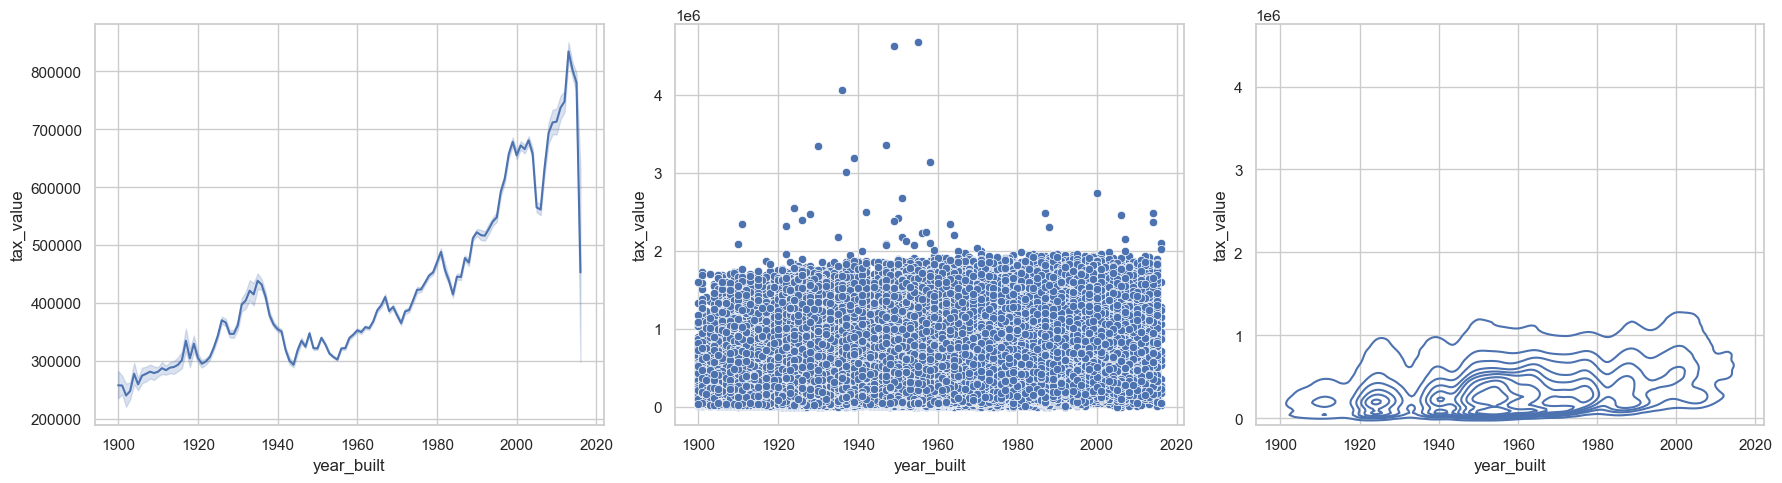

TAX_AMOUNT VS TAX_VALUE


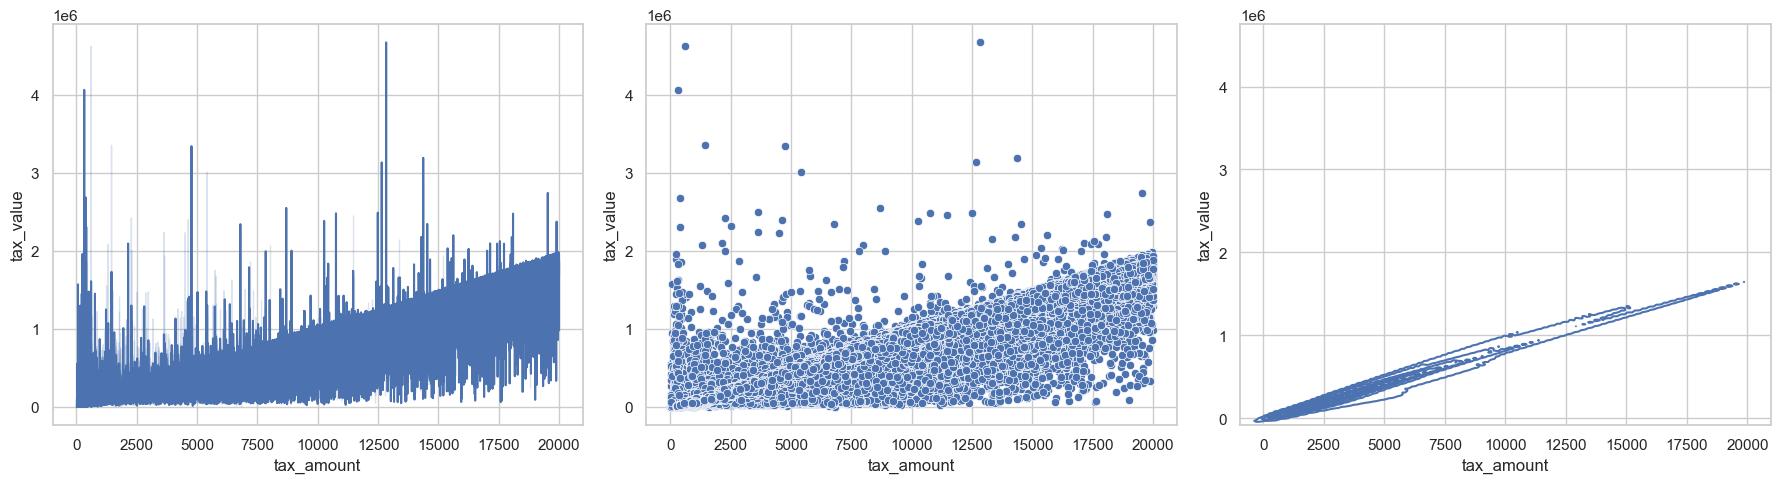

In [15]:
# plot all the low category columns to see the distributions

for col in continuous_comb:
    print(col[0].upper(), "VS", col[1].upper())
    # plots
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))   

    sns.lineplot(data= train, x=col[0] , y=col[1], ax= ax[0])
    sns.scatterplot(data= train, x=col[0] , y=col[1], ax= ax[1])
    sns.kdeplot(data= train, x=col[0] , y=col[1], ax= ax[2])
    
    plt.tight_layout()
    
    # save visual to file path
    explore_.save_visuals(fig=fig, viz_name=f"{col[0]}_vs_{col[1]}", folder_name= 2)
    
    plt.show()


- how strong is the relationship between these variables?
- how impactful is the first county to the target
- what's the relationship between sqr_feet and county

## Multivariate statistics

In [ ]:
# def plot_variable_pairs(train):
#     sns.pairplot(train,  corner=True)

In [ ]:
# plot_variable_pairs(train)

In [ ]:
# from tqdm.auto import tqdm, trange
# from IPython.display import display
# import time

# pbar = tqdm(total=1)
# display(pbar)

# # Simulate some computation in the cell
# for _ in trange(len(train)):
#     time.sleep(1)
#     pbar.update(0.01)
